In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
from test_DistillationIQA_single import DistillationIQASolver

obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


# dst:

In [6]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0869.png'

## Subset

In [10]:
import glob
TID_ADDR = "dataset/TID2013"
dsts = ["03","06","08", "10", "11", "23"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)



contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

def get_refs():
        return glob.glob(TID_ADDR+'/reference_images/*')

In [8]:
len(obj_stackV2.test(get_images_dst("14")[0] , refs[11], feature_extraction=True))

512

In [9]:
len(obj_org.test(get_images_dst("14")[0] , refs[11] , feature_extraction=True))

512

In [106]:
len(get_images_content("04"))
imgs4 = get_images_content("04")
ref4 = get_refs()[3]
ref4
imgs4[0].split(".")[0][-1]

'1'

In [101]:
import numpy as np

import random

random.seed(1111)

row = 3


lq_features = []
diff_feature = []
all_features = []
dists = []
conts = []
is_ref = []


for im  in imgs4:
        dd = obj_stackV2.test(im , get_random_HR_images(), feature_extraction=True)
        all_features.append(dd)
        lq_features.append(dd[:256])
        diff_feature.append(dd[256:])
        is_ref.append(0)
      

dd = obj_stackV2.test(ref4 , get_random_HR_images(), feature_extraction=True)
all_features.append(dd)
lq_features.append(dd[:256])
diff_feature.append(dd[256:])
is_ref.append(1)
    



lq_features = np.array(lq_features)
diff_feature = np.array(diff_feature)
all_features = np.array(all_features)

In [93]:
len(level) , len(lq_features)

(120, 120)

In [107]:
imgs4.append("REF")
for i in range(len(imgs4)-1):
    imgs4[i] = imgs4[i][-8:-4]

imgs4

['01_1',
 '01_2',
 '01_3',
 '01_4',
 '01_5',
 '02_1',
 '02_2',
 '02_3',
 '02_4',
 '02_5',
 '03_1',
 '03_2',
 '03_3',
 '03_4',
 '03_5',
 '04_1',
 '04_2',
 '04_3',
 '04_4',
 '04_5',
 '05_1',
 '05_2',
 '05_3',
 '05_4',
 '05_5',
 '06_1',
 '06_2',
 '06_3',
 '06_4',
 '06_5',
 '07_1',
 '07_2',
 '07_3',
 '07_4',
 '07_5',
 '08_1',
 '08_2',
 '08_3',
 '08_4',
 '08_5',
 '09_1',
 '09_2',
 '09_3',
 '09_4',
 '09_5',
 '10_1',
 '10_2',
 '10_3',
 '10_4',
 '10_5',
 '11_1',
 '11_2',
 '11_3',
 '11_4',
 '11_5',
 '12_1',
 '12_2',
 '12_3',
 '12_4',
 '12_5',
 '13_1',
 '13_2',
 '13_3',
 '13_4',
 '13_5',
 '14_1',
 '14_2',
 '14_3',
 '14_4',
 '14_5',
 '15_1',
 '15_2',
 '15_3',
 '15_4',
 '15_5',
 '16_1',
 '16_2',
 '16_3',
 '16_4',
 '16_5',
 '17_1',
 '17_2',
 '17_3',
 '17_4',
 '17_5',
 '18_1',
 '18_2',
 '18_3',
 '18_4',
 '18_5',
 '19_1',
 '19_2',
 '19_3',
 '19_4',
 '19_5',
 '20_1',
 '20_2',
 '20_3',
 '20_4',
 '20_5',
 '21_1',
 '21_2',
 '21_3',
 '21_4',
 '21_5',
 '22_1',
 '22_2',
 '22_3',
 '22_4',
 '22_5',
 '23_1',
 

In [21]:
import numpy as np

import random

random.seed(1111)

row = 3


lq_features = []
diff_feature = []
all_features = []
dists = []
conts = []
is_ref = []


for c in dsts:
    imgs = get_images_dst(c)
    imgs = random.sample(imgs, 40)
    for i in range(len(imgs)):
        dd = obj_stackV2.test(imgs[i] , get_random_HR_images(), feature_extraction=True)
        all_features.append(dd)
        lq_features.append(dd[:256])
        diff_feature.append(dd[256:])
        dists.append(int(c))
        conts.append(int(imgs[i].split(".")[0][-7:-5]))
        is_ref.append(0)
        
    print(row)
    row +=1

  
for im in get_refs():
    is_ref.append(1)
    dd = obj_stackV2.test(im , get_random_HR_images(), feature_extraction=True)
    all_features.append(dd)
    lq_features.append(dd[:256])
    diff_feature.append(dd[256:])
    



lq_features = np.array(lq_features)
diff_feature = np.array(diff_feature)
all_features = np.array(all_features)

3
4
5
6
7
8


In [22]:
len(lq_features.shape) , len(diff_feature.shape) , len(all_features.shape)

(2, 2, 2)

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(all_features)



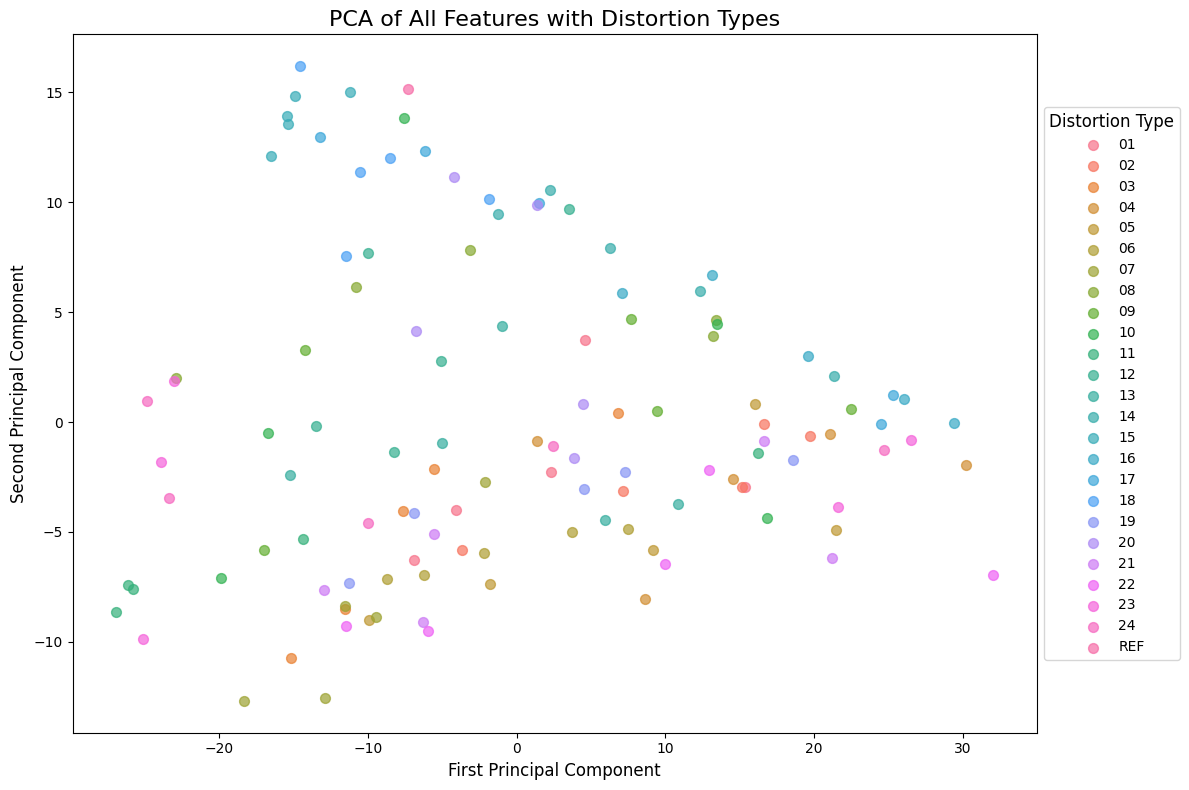

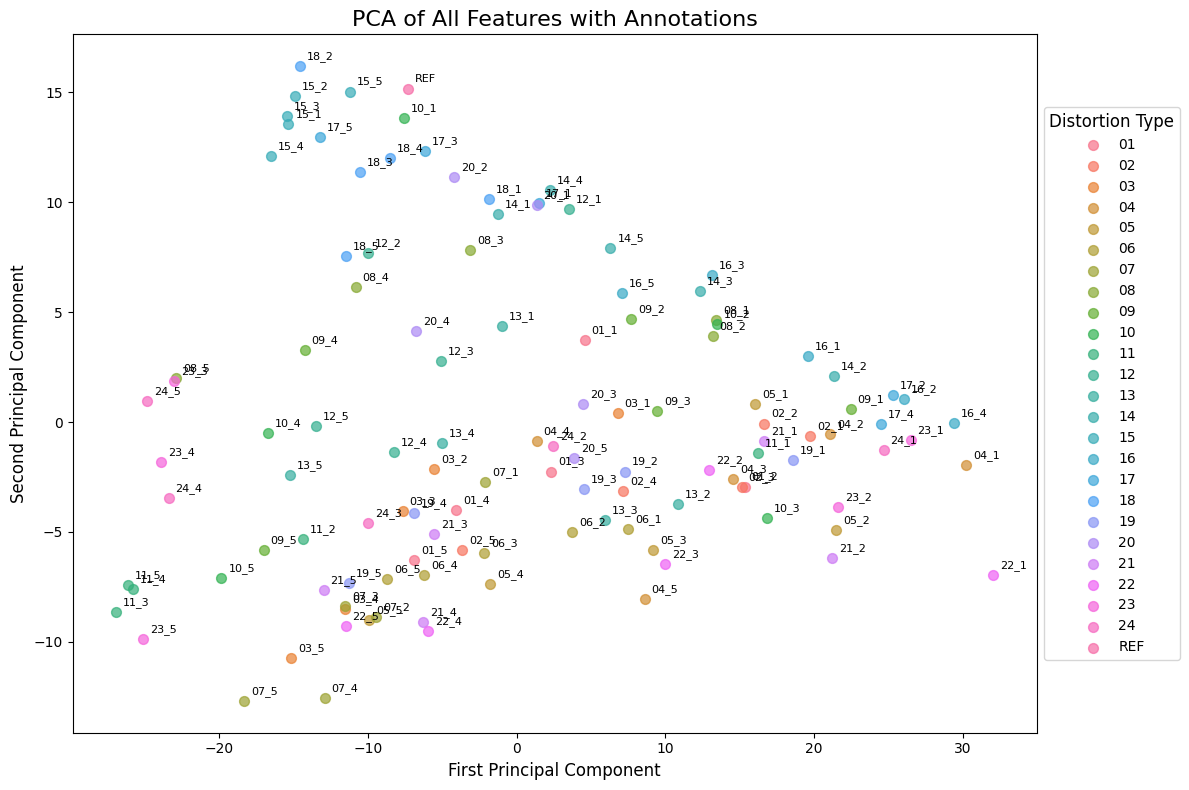

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


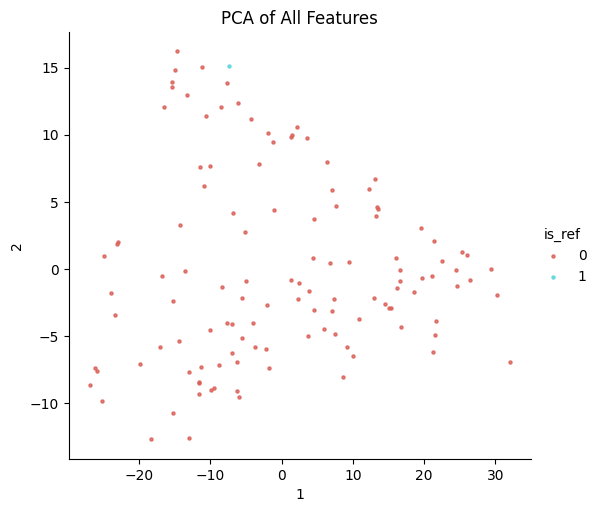

In [109]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'is_ref':is_ref,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               "names":imgs4
               })


# Create a new column 'distortion' based on the 'names' column
df['distortion'] = df['names'].apply(lambda x: x.split('_')[0] if '_' in x else 'REF')

# Create a color palette for the distortions
distortion_types = df['distortion'].unique()
color_palette = sns.color_palette("husl", n_colors=len(distortion_types))
color_dict = dict(zip(distortion_types, color_palette))

# Create the plot
plt.figure(figsize=(12, 8))
for distortion in distortion_types:
    subset = df[df['distortion'] == distortion]
    plt.scatter(subset['1'], subset['2'], c=[color_dict[distortion]], label=distortion, alpha=0.7, s=50)

plt.title('PCA of All Features with Distortion Types', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(title='Distortion Type', title_fontsize='12', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Create a plot with annotations for a subset of points
plt.figure(figsize=(12, 8))
for distortion in distortion_types:
    subset = df[df['distortion'] == distortion]
    plt.scatter(subset['1'], subset['2'], c=[color_dict[distortion]], label=distortion, alpha=0.7, s=50)

# Annotate a random subset of points
n_annotations = 121
random_indices = np.random.choice(df.index, size=n_annotations, replace=False)
for idx in random_indices:
    plt.annotate(df.loc[idx, 'names'], (df.loc[idx, '1'], df.loc[idx, '2']), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('PCA of All Features with Annotations', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend(title='Distortion Type', title_fontsize='12', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=False,scatter_kws={"s": 5})
sns.lmplot(x='1' , y='2', data=df, hue='is_ref',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='PCA of All Features')
# plt.legend(loc='upper right', fontsize='small')


plt.show()

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


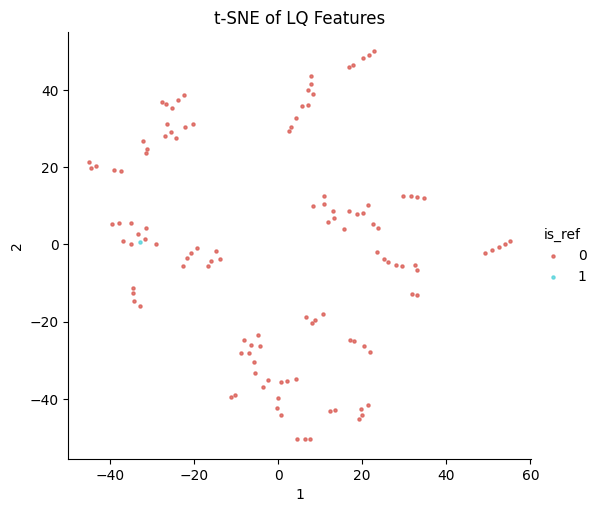

In [68]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(lq_features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'is_ref':is_ref,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='is_ref',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='t-SNE of LQ Features')

plt.show()

## CLIVE

In [33]:
import glob

clive_imgages = glob.glob("dataset/LIVEC/Images/*.*")[::2]
len(glob.glob("dataset/LIVEC/Images/*.*")[::2])

581

In [51]:
import numpy as np

import random




lq_features = []
diff_feature = []
all_features = []
dists = []
conts = []
is_ref = []


for c in clive_imgages:
    dd = obj_stackV2.test(c , get_random_HR_images(), feature_extraction=True)
    all_features.append(dd)
    lq_features.append(dd[:256])
    diff_feature.append(dd[256:])
    is_ref.append(0)
        
    

  
for im in get_refs():
    is_ref.append(1)
    dd = obj_stackV2.test(im , get_random_HR_images(), feature_extraction=True)
    all_features.append(dd)
    lq_features.append(dd[:256])
    diff_feature.append(dd[256:])
    



lq_features = np.array(lq_features)
diff_feature = np.array(diff_feature)
all_features = np.array(all_features)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(lq_features)


c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


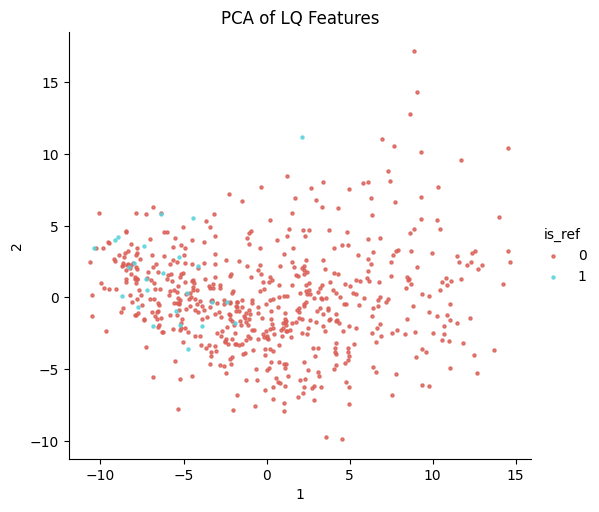

In [57]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'is_ref':is_ref,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

# sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=False,scatter_kws={"s": 5})
sns.lmplot(x='1' , y='2', data=df, hue='is_ref',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='PCA of LQ Features')
# plt.legend(loc='upper right', fontsize='small')


plt.show()

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


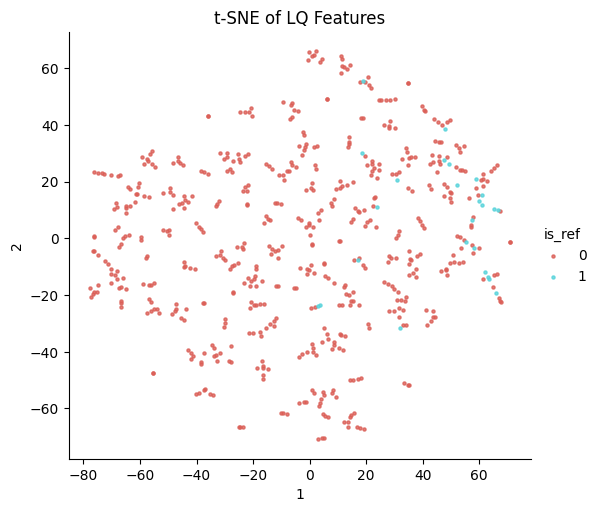

In [60]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(lq_features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'is_ref':is_ref,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='is_ref',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='t-SNE of LQ Features')

plt.show()